# Developing an AI for Hand Gesture Recognition

You are working for a gaming company developing interactive AI-powered games. Your task is to create a hand gesture recognition model to play a game of Rock, Paper, Scissors against human players. The model should be accurate and able to predict gestures from images in real-time.

The Rock, Paper, Scissors dataset, available in TensorFlow Datasets, contains RGB images of hands showing rock, paper, and scissors gestures. Your goal is to create a model using transfer learning and test its real-time application potential.

In [110]:
pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.1 MB/s eta 0:00:00


In [120]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import keras_tuner as kt
from tensorflow.keras import layers, models, optimizers




Dataset Info: tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_dir='/root/tensorflow_datasets/rock_paper_scissors/3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemo

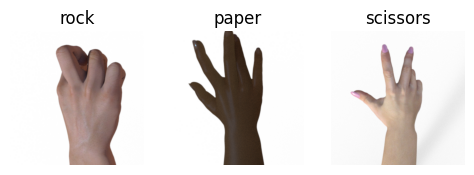

In [114]:
# Load Rock, Paper, Scissors Dataset
dataset, info = tfds.load('rock_paper_scissors', as_supervised=True, with_info=True)

# Split Dataset into Train and Test
train_dataset = dataset['train']
test_dataset = dataset['test']

# Print Dataset Information
print("Dataset Info:", info)
print(f"Number of training examples: {info.splits['train'].num_examples}")
print(f"Number of test examples: {info.splits['test'].num_examples}")
print("Classes:", info.features['label'].names)

# Visualize Sample Images
plt.figure(figsize=(10, 5))
for example in train_dataset.take(10):
    image, label = example
    plt.subplot(2, 5, label.numpy() + 1)
    plt.imshow(image)
    plt.title(info.features['label'].names[label.numpy()])
    plt.axis('off')
plt.show()

In [116]:
print(f"Dataset name: {info.name}")
print(f"Dataset version: {info.version}")
print(f"Description: {info.description}")
print(f"Homepage: {info.homepage}")
print(f"Total number of images: {info.splits['train'].num_examples + info.splits['test'].num_examples}")
print(f"Number of training images: {info.splits['train'].num_examples}")
print(f"Number of test images: {info.splits['test'].num_examples}")
print(f"Classes: {info.features['label'].names}")

Dataset name: rock_paper_scissors
Dataset version: 3.0.0
Description: Images of hands playing rock, paper, scissor game.
Homepage: http://laurencemoroney.com/rock-paper-scissors-dataset
Total number of images: 2892
Number of training images: 2520
Number of test images: 372
Classes: ['rock', 'paper', 'scissors']


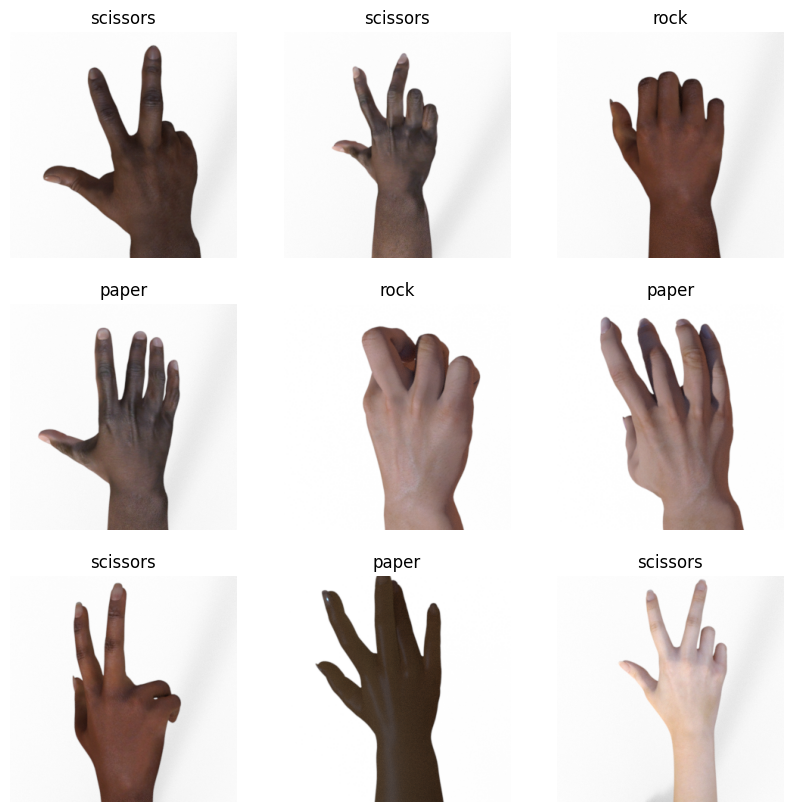

In [121]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(dataset['train'].take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(class_names[label.numpy()])
    plt.axis("off")
plt.show()

In [117]:

# Load Dataset
dataset, info = tfds.load('rock_paper_scissors', as_supervised=True, with_info=True)
train_dataset = dataset['train']
test_dataset = dataset['test']

# Preprocessing Function
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))
    image = preprocess_input(image)
    return image, label

# Apply Preprocessing, Batching, and Prefetching
train_dataset = train_dataset.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

# Load Pre-trained ResNet50 without top layers
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze layers

# Define Model Architecture
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')  # 3 output classes
])

# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train Model
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 29s 231ms/step - accuracy: 0.8024 - loss: 0.4764 - val_accuracy: 0.9167 - val_loss: 0.1933
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 0.9995 - loss: 0.0159 - val_accuracy: 0.8522 - val_loss: 0.2635
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 0.8683 - val_loss: 0.2581
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.8710 - val_loss: 0.2655
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.8548 - val_loss: 0.2949
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.8548 - val_loss: 0.3224
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 1.0000 - loss: 9.5905e-04 - val_accuracy: 0.9086 - val_loss: 0.2268
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0

In [118]:
base_model.trainable = True

# Recompile with lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Continue Training
fine_tune_history = model.fit(train_dataset, epochs=5, validation_data=test_dataset)


Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 103s 601ms/step - accuracy: 0.8783 - loss: 0.6106 - val_accuracy: 0.9462 - val_loss: 0.2236
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 37s 286ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.9489 - val_loss: 0.1442
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 287ms/step - accuracy: 1.0000 - loss: 8.5299e-04 - val_accuracy: 0.9651 - val_loss: 0.0966
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 289ms/step - accuracy: 1.0000 - loss: 4.1409e-04 - val_accuracy: 0.8683 - val_loss: 0.2577
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 292ms/step - accuracy: 1.0000 - loss: 6.9468e-04 - val_accuracy: 0.8038 - val_loss: 0.5697


In [100]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc:.2f}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.8395 - loss: 0.5612
Test Accuracy: 0.84


In [101]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))


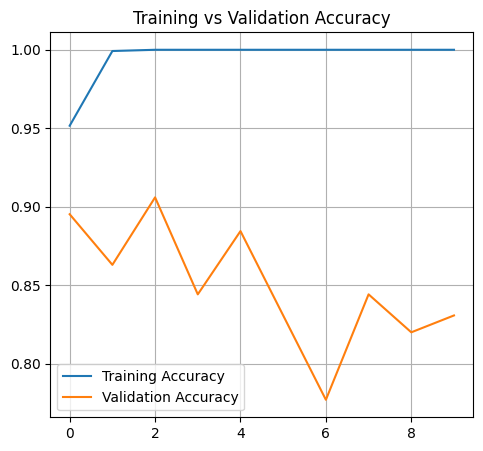

In [102]:
# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)

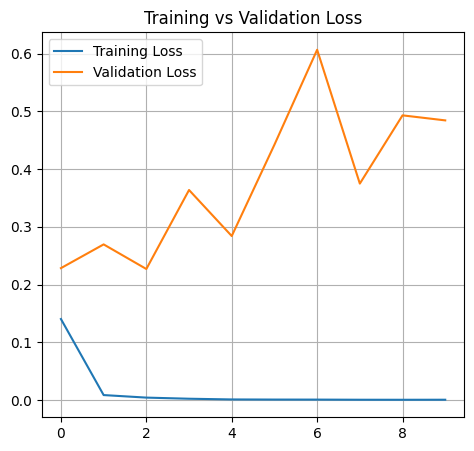

In [108]:
# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)

plt.show()

In [104]:
# Get class names from dataset info
class_names = info.features['label'].names

# Convert test dataset to list (image, label)
y_true = []
y_pred = []

for images, labels in test_dataset:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Classification Report:

              precision    recall  f1-score   support

        rock       0.67      1.00      0.81       124
       paper       1.00      0.65      0.79       124
    scissors       1.00      0.86      0.93       124

    accuracy                           0.84       372
   macro avg       0.89      0.84      0.84       372
weighted avg       0.89      0.84      0.84       372



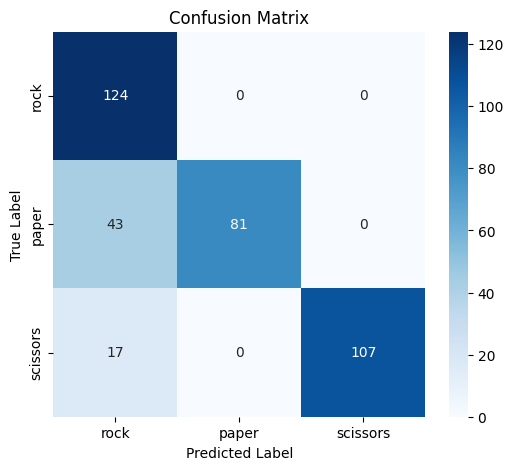

In [105]:
# Print Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# Plot Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


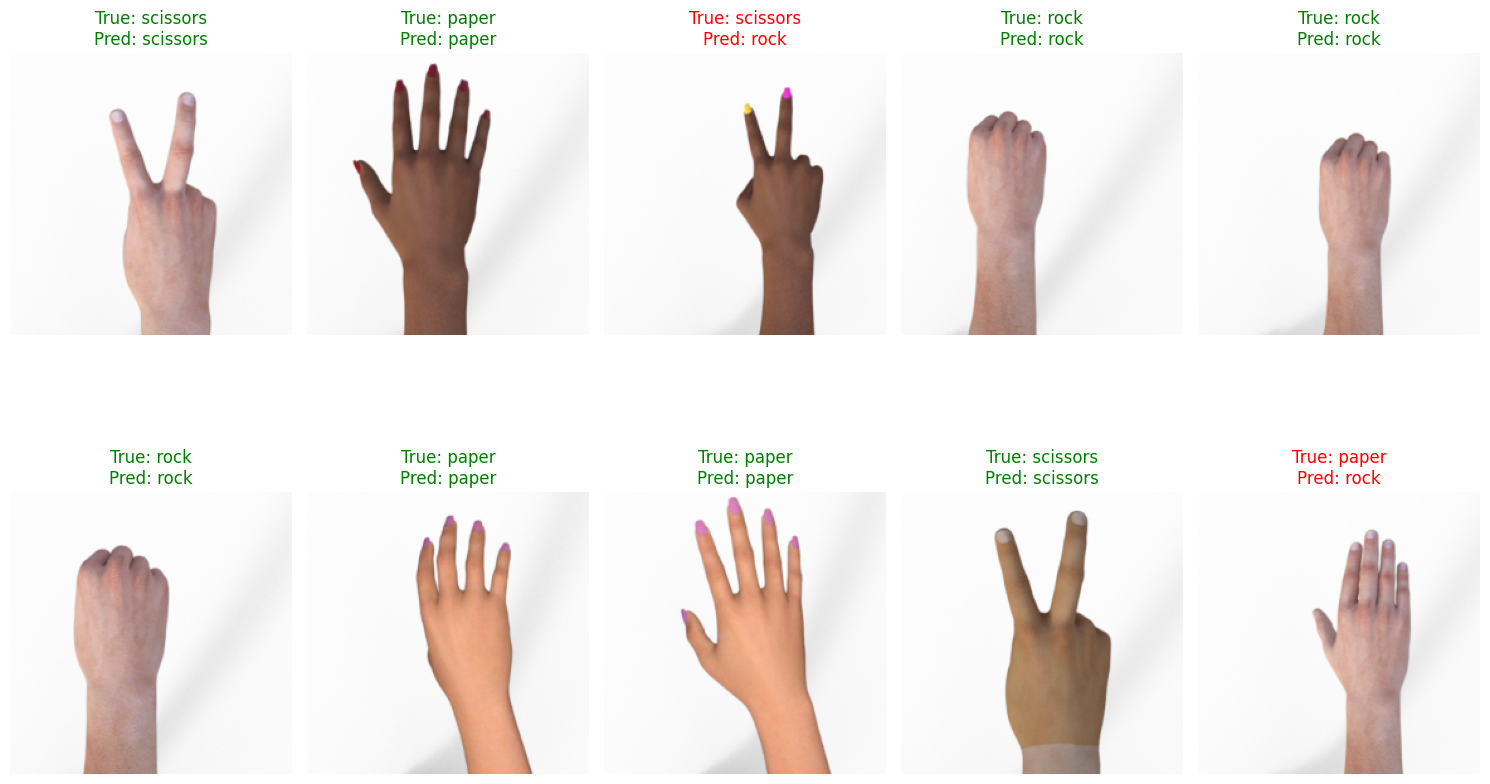

In [107]:
def rescale_for_display(image):
    # ResNet50 preprocessing subtracts mean RGB values
    # Approximate reverse by adding them back and clipping to [0, 255], then scale to [0, 1]
    image = image.numpy()
    image = image + [103.939, 116.779, 123.68]  # Add mean values in BGR order
    image = image[..., ::-1]  # Convert BGR to RGB
    image = np.clip(image / 255.0, 0, 1)
    return image

# Visualize predictions
plt.figure(figsize=(15, 10))
for images, labels in test_dataset.take(1):  # One batch
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    for i in range(10):
        ax = plt.subplot(2, 5, i + 1)
        image = rescale_for_display(images[i])
        plt.imshow(image)
        true_label = class_names[labels[i].numpy()]
        pred_label = class_names[predicted_labels[i]]
        color = 'green' if pred_label == true_label else 'red'
        plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
        plt.axis('off')

plt.tight_layout()
plt.show()


In [86]:
print("\n=== Class Information ===")
class_names = info.features['label'].names
num_classes = info.features['label'].num_classes
print(f"Number of classes: {num_classes}")
print(f"Class names: {class_names}")

# Count images per class in training set
train_counts = {class_names[i]:0 for i in range(num_classes)}
for _, label in dataset['train']:
    train_counts[class_names[label.numpy()]] += 1

# Count images per class in test set
test_counts = {class_names[i]:0 for i in range(num_classes)}
for _, label in dataset['test']:
    test_counts[class_names[label.numpy()]] += 1

print("\nTraining set images per class:")
for cls, count in train_counts.items():
    print(f"{cls}: {count} images")

print("\nTest set images per class:")
for cls, count in test_counts.items():
    print(f"{cls}: {count} images")


=== Class Information ===
Number of classes: 3
Class names: ['rock', 'paper', 'scissors']

Training set images per class:
rock: 840 images
paper: 840 images
scissors: 840 images

Test set images per class:
rock: 124 images
paper: 124 images
scissors: 124 images


In [87]:
print("\n=== Image Characteristics ===")
# Get first image to examine properties
for image, _ in dataset['train'].take(1):
    sample_image = image.numpy()

print(f"Image data type: {sample_image.dtype}")
print(f"Image shape: {sample_image.shape} (height, width, channels)")
print(f"Number of pixels: {sample_image.size}")
print(f"Minimum pixel value: {np.min(sample_image)}")
print(f"Maximum pixel value: {np.max(sample_image)}")
print(f"Mean pixel value: {np.mean(sample_image):.2f}")
print(f"Standard deviation: {np.std(sample_image):.2f}")


=== Image Characteristics ===
Image data type: uint8
Image shape: (300, 300, 3) (height, width, channels)
Number of pixels: 270000
Minimum pixel value: 12
Maximum pixel value: 255
Mean pixel value: 194.78
Standard deviation: 87.13


In [128]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
import keras_tuner as kt
import tensorflow_datasets as tfds

# Load the dataset
dataset, info = tfds.load('rock_paper_scissors', as_supervised=True, with_info=True)
train_dataset = dataset['train']
test_dataset = dataset['test']

# Preprocess the images
IMG_SIZE = 224  # ResNet50 requires 224x224 input size

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.keras.applications.resnet50.preprocess_input(image)
    return image, label

train_dataset = train_dataset.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

# Define the hypermodel (the model to tune)
def build_model(hp):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
    base_model.trainable = False  # Freeze the base ResNet50 model

    model = models.Sequential()
    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(
        units=hp.Int('dense_units', min_value=64, max_value=512, step=64),
        activation='relu'
    ))
    model.add(layers.Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(layers.Dense(3, activation='softmax'))  # 3 classes

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize the Keras Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='keras_tuner',
    project_name='rps_resnet50'
)

# Perform the hyperparameter search
tuner.search(train_dataset, validation_data=test_dataset, epochs=10)

# Get the best model and hyperparameters
best_model = tuner.get_best_models(1)[0]
best_hps = tuner.get_best_hyperparameters(1)[0]

print(f"Best dense units: {best_hps.get('dense_units')}")
print(f"Best dropout: {best_hps.get('dropout')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")

# Evaluate the best model on the test set
loss, acc = best_model.evaluate(test_dataset)
print(f"Test Accuracy: {acc:.2f}")


Trial 10 Complete [00h 02m 14s]
val_accuracy: 0.9032257795333862

Best val_accuracy So Far: 0.9596773982048035
Total elapsed time: 00h 20m 31s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best dense units: 64
Best dropout: 0.30000000000000004
Best learning rate: 0.01
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 205ms/step - accuracy: 0.9648 - loss: 0.1255
Test Accuracy: 0.96
